<a href="https://colab.research.google.com/github/albinjohn366/DataScience_Tutorials/blob/Python-Basics-for-DataScience/Working_with_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Reading and writing text files

In [ ]:
# This is how to read a text file as dataframe in Python
df = pd.read_csv('/content/sample_data/sample.txt', header=None)

# When the header is provided as None, there would be no column names
df

,0,1,2
0,man,24,56
1,woman,34,89
2,man,78,60
3,man,89,58
4,man,27,90
5,woman,22,54


In [ ]:
# Reading using read_table
df = pd.read_table('/content/sample_data/sample.txt', sep=',', header=None)
df

,0,1,2
0,man,24,56
1,woman,34,89
2,man,78,60
3,man,89,58
4,man,27,90
5,woman,22,54


In [ ]:
# Reading only a few number of rows
df = pd.read_csv('/content/sample_data/sample.txt', header=None, nrows=3)
df

,0,1,2
0,man,24,56
1,woman,34,89
2,man,78,60


In [ ]:
import sys

# Writing dataframe back into a csv file
df.to_csv(sys.stdout, header=None)

0,man,24,56
1,woman,34,89
2,man,78,60


# Reading data from HTML or a website

In [ ]:
df_list = pd.io.html.read_html('https://en.wikipedia.org/wiki/List_of_Tom_Holland_performances')
df_list[0].head()

,Tom Holland,Tom Holland.1
0,Holland in 2018,Holland in 2018
1,Born,"Thomas Stanley Holland (age 25)London, England..."
2,Education,Wimbledon CollegeBRIT School for Performing Ar...
3,Occupation,Actor
4,Years active,2006–present


# Merge

In [ ]:
df1 = pd.DataFrame({'key': (1, 2, 3), 'values 1': ('a', 'b', 'c')})
df2 = pd.DataFrame({'key': (1, 2, 3), 'values 2': ('d', 'e', 'f')})

In [ ]:
df3 = pd.merge(df1, df2, on='key')
df3

,key,values 1,values 2
0,1,a,d
1,2,b,e
2,3,c,f


In [ ]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display(df1)
display(df2)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [ ]:
pd.merge(df1, df2, how='right')

,employee,group,hire_date
0,Lisa,Engineering,2004
1,Bob,Accounting,2008
2,Jake,Engineering,2012
3,Sue,HR,2014


In [ ]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display(df1, df4)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [ ]:
pd.merge(df1, df4, how='right')

,employee,group,supervisor
0,Bob,Accounting,Carly
1,Jake,Engineering,Guido
2,Lisa,Engineering,Guido
3,Sue,HR,Steve


# Merge by index

In [ ]:
df1[:-1]

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering


In [ ]:
df5 = pd.DataFrame(['Male', 'Female'], index=['Accounting', 'Engineering'])
df5

,0
Accounting,Male
Engineering,Female


In [ ]:
pd.merge(df1, df5, left_on='group', right_index=True)

,employee,group,0
0,Bob,Accounting,Male
1,Jake,Engineering,Female
2,Lisa,Engineering,Female


In [ ]:
# Working with datasets that have sub index
df_one = pd.DataFrame({'key1': ['Melvin', 'Albin', 'Malu', 'Ann'], 'key2': [28, 23, 25, 24]})
df_one

,key1,key2
0,Melvin,28
1,Albin,23
2,Malu,25
3,Ann,24


In [ ]:
df_two = pd.DataFrame(np.arange(16).reshape(8, 2), index=[['Albin', 'Albin', 'Malu', 'Malu', 'Ann', 'Ann', 'Melvin', 'Melvin'], 
                                                         [23, 11, 25, 13, 24, 12, 28, 14]])
df_two

0   1
Albin  23   0   1
       11   2   3
Malu   25   4   5
       13   6   7
Ann    24   8   9
       12  10  11
Melvin 28  12  13
       14  14  15

In [ ]:
pd.merge(df_one, df_two, left_on=['key1', 'key2'], right_index=True)

,key1,key2,0,1
0,Melvin,28,12,13
1,Albin,23,0,1
2,Malu,25,4,5
3,Ann,24,8,9


# Using Join instead of merge

In [ ]:
df_one.join(df_two, on=['key1', 'key2'], how='left')

,key1,key2,0,1
0,Melvin,28,12,13
1,Albin,23,0,1
2,Malu,25,4,5
3,Ann,24,8,9


In [ ]:
# Using how = left
df_one['new_column'] = [90, 90, 78, 67]
df_one

,key1,key2,new_column
0,Melvin,28,90
1,Albin,23,90
2,Malu,25,78
3,Ann,24,67


In [ ]:
df_one.join(df_two, on=['key1', 'key2'], how='right')

,key1,key2,new_column,0,1
1,Albin,23,90.0,0,1
3,Albin,11,NaN,2,3
2,Malu,25,78.0,4,5
3,Malu,13,NaN,6,7
3,Ann,24,67.0,8,9
3,Ann,12,NaN,10,11
0,Melvin,28,90.0,12,13
3,Melvin,14,NaN,14,15


# Concat

In [ ]:
# Numpy
a = np.arange(10).reshape(5, 2)
b = np.arange(20, 30).reshape(5, 2)

display(np.concatenate((a, b), axis=1))
print()
display(np.concatenate((a, b), axis=0))

array([[ 0,  1, 20, 21],
       [ 2,  3, 22, 23],
       [ 4,  5, 24, 25],
       [ 6,  7, 26, 27],
       [ 8,  9, 28, 29]])

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [20, 21],
       [22, 23],
       [24, 25],
       [26, 27],
       [28, 29]])

In [ ]:
# Pandas
a_df = pd.DataFrame(a)
b_df = pd.DataFrame(b)
display(pd.concat([a_df, b_df], axis=0))
print()
display(pd.concat([a_df, b_df], axis=1))

# with keys
print()
display(pd.concat([a_df, b_df], axis=1, keys=['cat1', 'cat2']))

,0,1
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9
0,20,21
1,22,23
2,24,25
3,26,27
4,28,29


,0,1,0,1
0,0,1,20,21
1,2,3,22,23
2,4,5,24,25
3,6,7,26,27
4,8,9,28,29


cat1    cat2    
     0  1    0   1
0    0  1   20  21
1    2  3   22  23
2    4  5   24  25
3    6  7   26  27
4    8  9   28  29

In [ ]:
# Ignoring the index
a_df = pd.DataFrame(a)
b_df = pd.DataFrame(b)
display(pd.concat([a_df, b_df], axis=1, ignore_index=True))

,0,1,2,3
0,0,1,20,21
1,2,3,22,23
2,4,5,24,25
3,6,7,26,27
4,8,9,28,29


# Combining in pandas

This can be used to replace the nan values in a dataframe or a series with corresponding values in a different series or dataframe.

In [ ]:
ser_1 = pd.Series([1, np.nan, 4, 8, np.nan, 3], index=['Q', 'R', 'S', 'T', 'U', 'V'])
print(ser_1)
print()

ser_2 = pd.Series(np.arange(len(ser_1)), index=['Q', 'R', 'S', 'T', 'U', 'V'])
print(ser_2)

Q    1.0
R    NaN
S    4.0
T    8.0
U    NaN
V    3.0
dtype: float64

Q    0
R    1
S    2
T    3
U    4
V    5
dtype: int64


In [ ]:
# Using the combine function
ser_1.combine_first(ser_2)

Q    1.0
R    1.0
S    4.0
T    8.0
U    4.0
V    3.0
dtype: float64

# Stacking and unstacking

Stacking and unstacking can be done to change the default index of a dataset.

In [ ]:
# Here we are naming the index for rows and columns
df_for_stacking = pd.DataFrame(np.arange(10).reshape(2, 5), index=pd.Index(['Cochin', 'Bangalore'], name='city'),
                               columns=pd.Index(['a', 'b', 'c', 'd', 'e'], name='character'))
df_for_stacking

character,a,b,c,d,e
city,,,,,
Cochin,0,1,2,3,4
Bangalore,5,6,7,8,9


In [ ]:
df_stacked = df_for_stacking.stack()
display(df_stacked)

city       character
Cochin     a            0
           b            1
           c            2
           d            3
           e            4
Bangalore  a            5
           b            6
           c            7
           d            8
           e            9
dtype: int64

In [ ]:
# Now lets see how we can reverse the default index
df_reversed = df_stacked.unstack('city')
df_reversed

city,Cochin,Bangalore
character,,
a,0,5
b,1,6
c,2,7
d,3,8
e,4,9


# Pivotting

In [ ]:
for_pivot = pd.read_csv('/sample data for pivot table.csv')
for_pivot.head()

,Sample sales data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date,Color,Region,Units,Sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3-Jan-16,Red,West,1,$11.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13-Jan-16,Blue,South,8,$96.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21-Jan-16,Green,West,2,$26.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# We are gonna pivot the table to view the dates for which the colors where different and its sales
for_pivot.pivot(index='Sample sales data', columns='Unnamed: 1', values='Unnamed: 4').head()

Unnamed: 1,NaN,Blue,Color,Green,Red,Silver
Sample sales data,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-Apr-18,NaN,NaN,NaN,NaN,NaN,$56.00
1-Aug-19,NaN,NaN,NaN,NaN,$96.00,NaN
1-Dec-17,NaN,$96.00,NaN,NaN,NaN,NaN
1-Dec-18,NaN,NaN,NaN,NaN,$84.00,NaN


# Duplicated values

In [ ]:
# Creating a datafrane with duplicate values
duplicated_df = pd.DataFrame({'columnn_1': ['A'] * 3 + ['B'] * 2, 'column_2': [2, 2, 3, 4, 4]})
display(duplicated_df)

# Finding the duplicated rows
duplicated_df.duplicated()

,columnn_1,column_2
0,A,2
1,A,2
2,A,3
3,B,4
4,B,4


0    False
1     True
2    False
3    False
4     True
dtype: bool

In [ ]:
# Getting rid of the dupliicated rows
duplicated_df.drop_duplicates()

,columnn_1,column_2
0,A,2
2,A,3
3,B,4


In [ ]:
# Specifying the column for removing the duplicates
duplicated_df.drop_duplicates(['column_2'])

,columnn_1,column_2
0,A,2
2,A,3
3,B,4


In [ ]:
#  Taking the last item only
duplicated_df.drop_duplicates(['column_2'], keep='last')

,columnn_1,column_2
1,A,2
2,A,3
4,B,4


# Mapping

In [ ]:
df = pd.DataFrame([['albin', 'male', 24], ['Nivin', 'Male', 36], ['Ann', 'Female', 24]], columns=['Name', 'Gender', 'Age'])
display(df)
print()

# Mapping
map = {24: 'Young', 36: 'Mature'}
df['Category'] = df['Age'].map(map)
display(df)

,Name,Gender,Age
0,albin,male,24
1,Nivin,Male,36
2,Ann,Female,24


,Name,Gender,Age,Category
0,albin,male,24,Young
1,Nivin,Male,36,Mature
2,Ann,Female,24,Young


# Replace

In [ ]:
# Singluar replace
df['Age'].replace(24, 25, inplace=True)
display(df)
print()

# Multiple replace
df['Gender'].replace(['male', 'Female'], ['Male', 'female'], inplace=True)
display(df)

,Name,Gender,Age,Category
0,albin,male,25,Young
1,Nivin,Male,36,Mature
2,Ann,Female,25,Young


,Name,Gender,Age,Category
0,albin,Male,25,Young
1,Nivin,Male,36,Mature
2,Ann,female,25,Young


# Rename

In [ ]:
# Renaming the column names
df.index = ['Person 1', 'Person 2', 'Person 3']
display(df)
print()

df.rename(columns={'Age': 'age'}, inplace=True)
df

,Name,Gender,Age,Category
Person 1,albin,Male,25,Young
Person 2,Nivin,Male,36,Mature
Person 3,Ann,female,25,Young


,Name,Gender,age,Category
Person 1,albin,Male,25,Young
Person 2,Nivin,Male,36,Mature
Person 3,Ann,female,25,Young


# Group by

In [ ]:
dataframe = pd.DataFrame({'key_1': ['x', 'y', 'y', 'z'], 'key_2': ['alpha', 'beta', 'alpha', 'beta'],
                          'dataset_1': np.random.randn(4), 'dataset_2': np.random.randn(4)})
dataframe

,key_1,key_2,dataset_1,dataset_2
0,x,alpha,0.001344,-0.825964
1,y,beta,-1.425212,0.755661
2,y,alpha,0.174851,0.742017
3,z,beta,0.918896,0.707554


In [ ]:
group_1 = dataframe['dataset_1'].groupby(dataframe['key_1'])
group_1.describe()

,count,mean,std,min,25%,50%,75%,max
key_1,,,,,,,,
x,1.0,0.001344,NaN,0.001344,0.001344,0.001344,0.001344,0.001344
y,2.0,-0.625181,1.131415,-1.425212,-1.025196,-0.625181,-0.225165,0.174851
z,1.0,0.918896,NaN,0.918896,0.918896,0.918896,0.918896,0.918896


In [ ]:
# Iteration in the group
for name, group in group_1:
  print('This is group {}:'.format(name))
  print(group)
  print()

This is group x:
0    0.001344
Name: dataset_1, dtype: float64

This is group y:
1   -1.425212
2    0.174851
Name: dataset_1, dtype: float64

This is group z:
3    0.918896
Name: dataset_1, dtype: float64



In [ ]:
# Let us try the same with a different dataset now
df

,Name,Gender,age,Category
Person 1,albin,Male,25,Young
Person 2,Nivin,Male,36,Mature
Person 3,Ann,female,25,Young


In [ ]:
age_group = df['Name'].groupby(df['age'])
for age, group in age_group:
  print("This is the group having the age {}:".format(age))
  print(group)
  print()

This is the group having the age 25:
Person 1    albin
Person 3      Ann
Name: Name, dtype: object

This is the group having the age 36:
Person 2    Nivin
Name: Name, dtype: object



In [ ]:
# A different approach using the column names
group_using_column = dict(list(df.groupby('age')))
display(group_using_column)

group_using_column[25]

{25:            Name  Gender  age Category
 Person 1  albin    Male   25    Young
 Person 3    Ann  female   25    Young,
 36:            Name Gender  age Category
 Person 2  Nivin   Male   36   Mature}

,Name,Gender,age,Category
Person 1,albin,Male,25,Young
Person 3,Ann,female,25,Young


In [ ]:
# Grouping by and doing operations
animals = pd.DataFrame(np.arange(16).reshape(4, 4), index=['Dog', 'Cat', 'Pegion', 'Turtle'])
display(animals)
print()

behaviour = {0: 'good', 1: 'good', 2: 'bad', 3:'bad'}
animals.groupby(behaviour, axis=1).sum()

,0,1,2,3
Dog,0,1,2,3
Cat,4,5,6,7
Pegion,8,9,10,11
Turtle,12,13,14,15


,bad,good
Dog,5,1
Cat,13,9
Pegion,21,17
Turtle,29,25


# Aggregation

In [2]:
import pandas as pd

wine_quality = pd.read_csv('/content/sample_data/winequalityN.csv')
wine_quality.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
# Defining a min max function
def min_max(arr):
  return max(arr) - min(arr)

In [11]:
min_max = wine_quality.groupby('quality').agg(min_max)
min_max

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.6,1.410,0.66,15.50,0.245,286.0,431.0,0.00970,0.76,0.58,4.6
4,7.9,1.020,1.00,16.85,0.597,135.5,265.0,0.01180,1.16,1.75,5.1
5,11.4,1.230,1.00,22.90,0.602,129.0,338.0,0.01593,1.00,1.71,6.9
6,10.5,0.960,1.66,65.10,0.400,111.0,288.0,0.05140,1.29,1.72,5.6
7,11.4,0.835,0.76,18.35,0.346,105.0,282.0,0.01609,0.98,1.14,5.6
8,NaN,0.730,0.71,14.00,0.107,102.0,200.5,0.01347,0.84,0.85,5.5
9,2.5,0.120,0.20,9.00,0.017,33.0,54.0,0.00735,0.21,0.25,2.5


In [12]:
# Adding a new aggregate value as a new column
wine_quality['quality / alcohol'] = wine_quality['quality'] / wine_quality['alcohol']
wine_quality.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality / alcohol
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0.681818
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0.631579
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0.594059
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.606061
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.606061


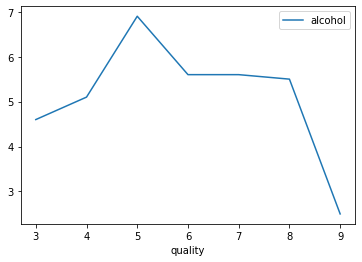

In [14]:
# Plotting a line graph on the min max table
min_max.plot(y='alcohol')